## Part2. Google+ Network

#### Question 18

In [1]:
library('igraph')

Warning message:
"package 'igraph' was built under R version 3.6.3"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [2]:
gg_files <- list.files(path = "gplus", pattern = "*.circles")
over_2_gg_count <- 0
for (f in gg_files){
  f <- paste("gplus/", f, sep = "")
  if (length(readLines(f)) > 2){
    over_2_gg_count <- over_2_gg_count + 1
  }
}
print(paste("Total number of personalized network:", length(gg_files)))
print(paste("Total number of personalized network of more than 2 circles:", over_2_gg_count))

[1] "Total number of personalized network: 132"
[1] "Total number of personalized network of more than 2 circles: 57"


#### Question 19

In [3]:
ID_1 <- "109327480479767108490"
ID_2 <- "115625564993990145546"
ID_3 <- "101373961279443806744"
Persons <- c(ID_1, ID_2, ID_3)

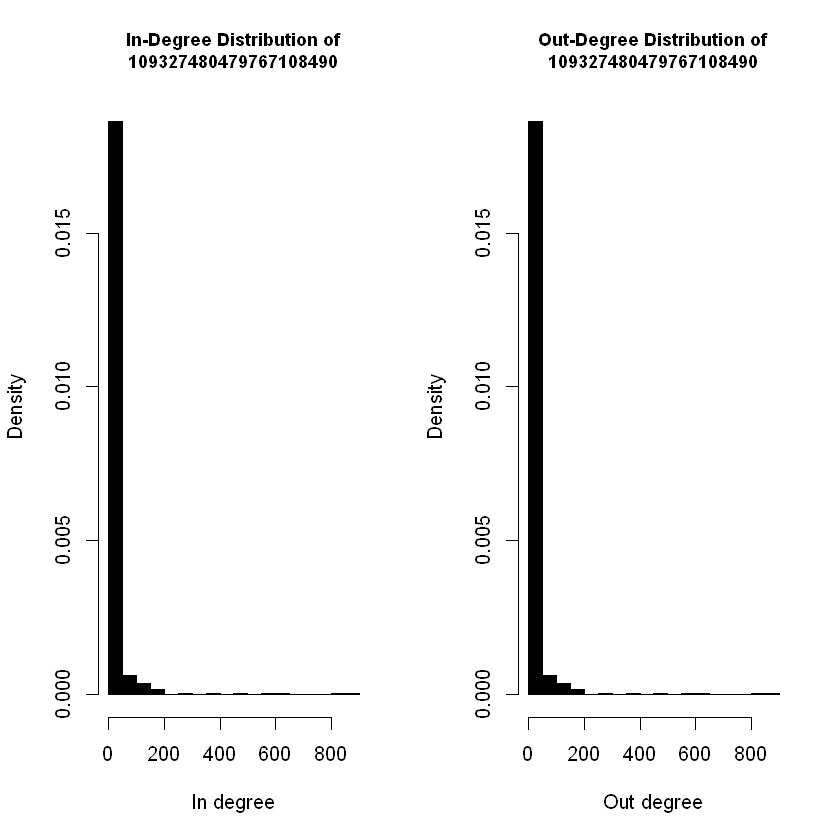

In [4]:
f <- paste("gplus/", ID_1, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
in_deg <- degree(g, mode = "in")
out_deg <- degree(g, mode = "out")
par(mfrow = c(1,2))
hist(in_deg, breaks = 20, col = 'black', freq = FALSE, 
    main = paste('In-Degree Distribution of\n', ID_1, sep = ""), cex.main = 0.9,
    xlab = "In degree", ylab = "Density")
hist(out_deg, breaks = 20, col = 'black', freq = FALSE, 
    main = paste('Out-Degree Distribution of\n', ID_1, sep = ""),  cex.main = 0.9,
    xlab = "Out degree", ylab = "Density")

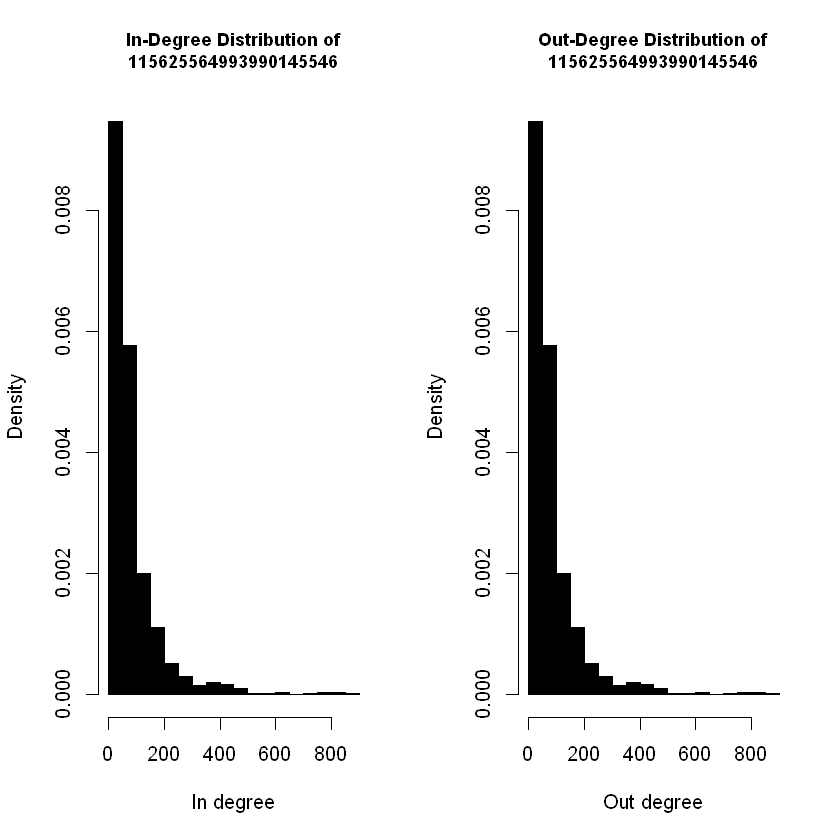

In [5]:
f <- paste("gplus/", ID_2, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
in_deg <- degree(g, mode = "in")
out_deg <- degree(g, mode = "out")
par(mfrow = c(1,2))
hist(in_deg, breaks = 20, col = 'black', freq = FALSE, 
    main = paste('In-Degree Distribution of\n', ID_2, sep = ""), cex.main = 0.9,
    xlab = "In degree", ylab = "Density")
hist(out_deg, breaks = 20, col = 'black', freq = FALSE, 
    main = paste('Out-Degree Distribution of\n', ID_2, sep = ""),  cex.main = 0.9,
    xlab = "Out degree", ylab = "Density")

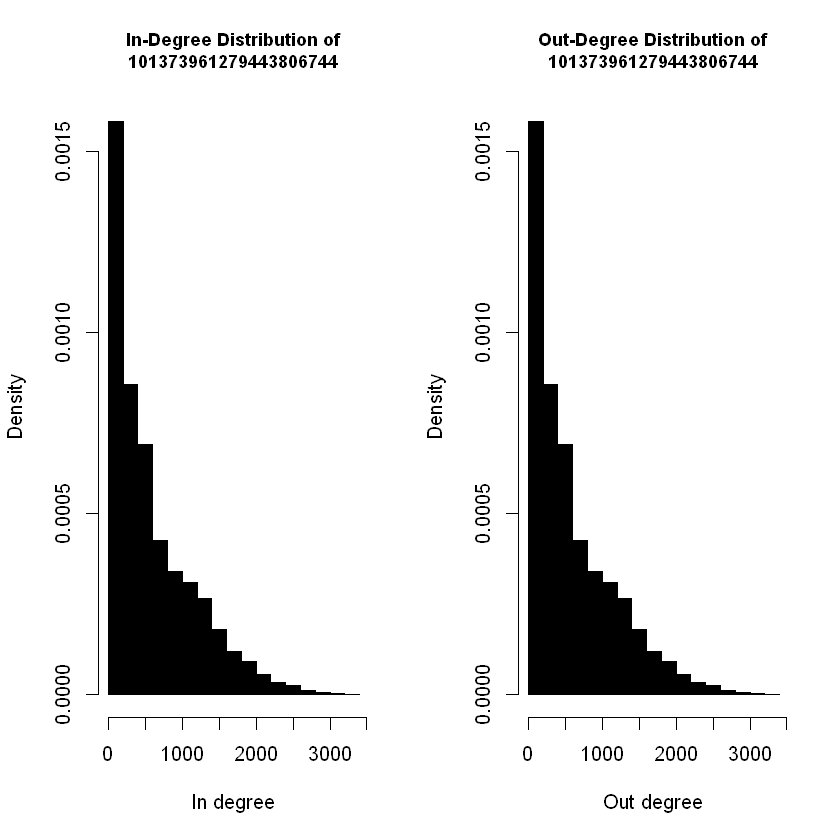

In [6]:
f <- paste("gplus/", ID_3, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
in_deg <- degree(g, mode = "in")
out_deg <- degree(g, mode = "out")
par(mfrow = c(1,2))
hist(in_deg, breaks = 20, col = 'black', freq = FALSE, 
    main = paste('In-Degree Distribution of\n', ID_3, sep = ""), cex.main = 0.9,
    xlab = "In degree", ylab = "Density")
hist(out_deg, breaks = 20, col = 'black', freq = FALSE, 
    main = paste('Out-Degree Distribution of\n', ID_3, sep = ""),  cex.main = 0.9,
    xlab = "Out degree", ylab = "Density")

#### Question 20

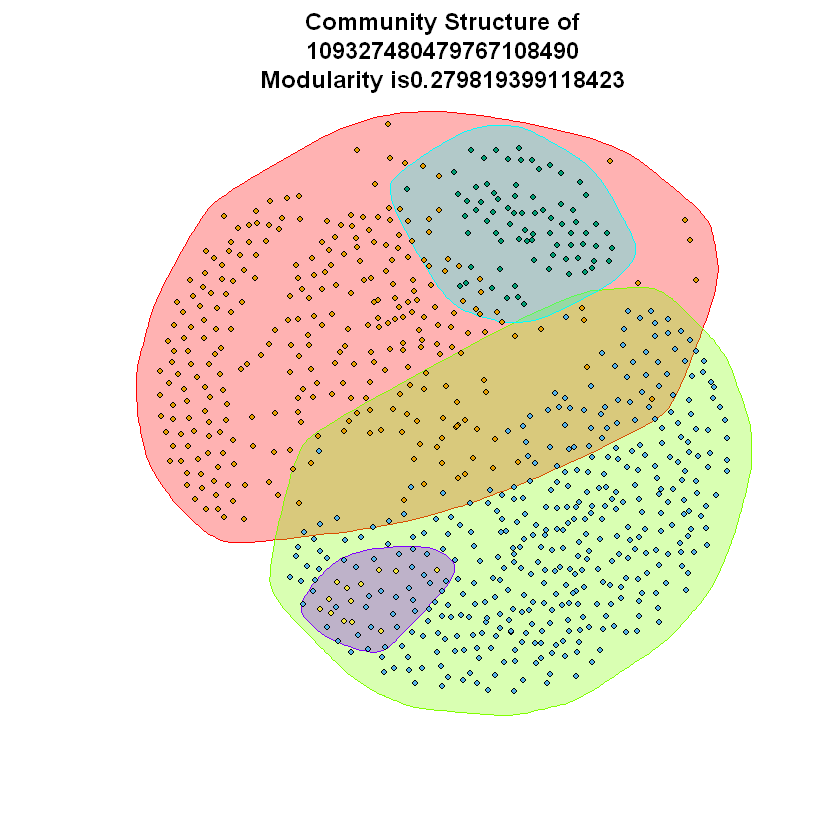

In [7]:
f <- paste("gplus/", ID_1, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
communities <- cluster_walktrap(g, modularity = TRUE)
plot(communities, g, vertex.label = NA, vertex.size = 2, edge.lty = 0,
         main = paste('Community Structure of\n', ID_1,
                          '\nModularity is' , modularity(communities), sep = ""))

    

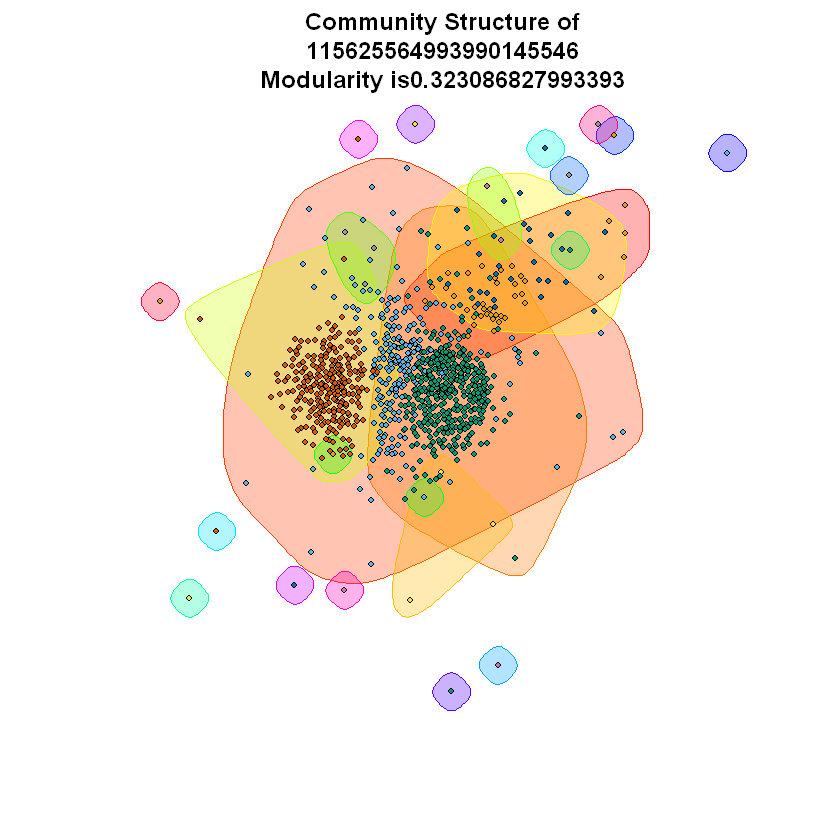

In [8]:
f <- paste("gplus/", ID_2, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
communities <- cluster_walktrap(g, modularity = TRUE)
plot(communities, g, vertex.label = NA, vertex.size = 2, edge.lty = 0,
         main = paste('Community Structure of\n', ID_2,
                          '\nModularity is' , modularity(communities), sep = ""))

    

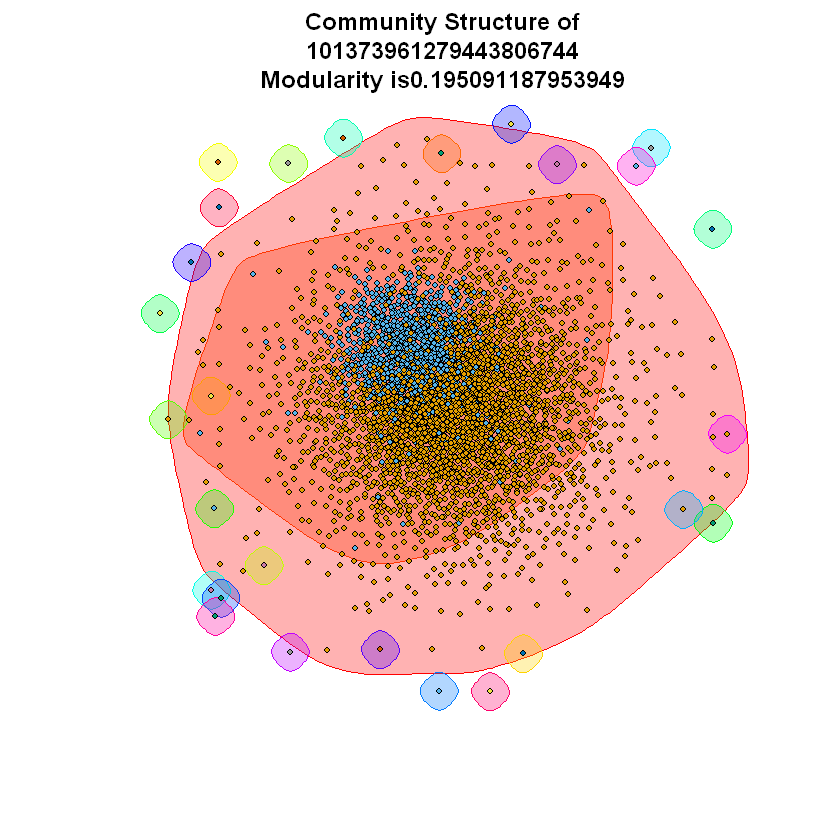

In [9]:
f <- paste("gplus/", ID_3, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
communities <- cluster_walktrap(g, modularity = TRUE)
plot(communities, g, vertex.label = NA, vertex.size = 2, edge.lty = 0,
         main = paste('Community Structure of\n', ID_3,
                          '\nModularity is' , modularity(communities), sep = ""))

    

#### Question 21

##### We will discuss this part in our report

#### Question 22

##### For the first person

In [11]:
f <- paste("gplus/", ID_1, ".circles", sep = "")
circles <- readLines(f)

circle_nodes <- c()
circle_node_count_vector <- rep(0,length(circles))
nodes_in_circles <- c()

for (i in c(1:length(circles))) {
    circle_nodes <- unlist(strsplit(circles[i], "\t"))
    circle_nodes <- circle_nodes[-1] # remove the header
    circle_node_count_vector[i] <- length(circle_nodes)
    
    # this loop records all the nodes with circle information in nodes_in_circles vector, preparation for N 
    for (j in c(1:length(circle_nodes))) { 
        if (circle_nodes[j] %in% nodes_in_circles == FALSE) {
            nodes_in_circles <- c(nodes_in_circles, circle_nodes[j])
        }
    }         
}

a <- circle_node_count_vector

In [35]:
N <- length(nodes_in_circles)
paste('N = ', N)

[1] "N =  764"

In [15]:
f <- paste("gplus/", ID_1, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
communities <- cluster_walktrap(g, modularity = TRUE)

b <- rep(0,length(communities))

for (i in c(1:length(V(g)))) {
    node_id <- V(g)[i]$name
    if (node_id %in% nodes_in_circles) {
        community_index <- membership(communities)[[i]] 
        b[community_index] <- b[community_index] + 1 
    }
}

In [16]:
A_matrix <- matrix(1:(length(circles)*length(communities)), nrow = length(communities))
for (j in c(1:length(communities))) {    
        community_nodes <- c()
    for (k in c(1:length(V(g)))) {
        community_index <- membership(communities)[[k]]
        if (community_index == j) {
            node_id <- V(g)[k]$name
            community_nodes <- c(community_nodes, node_id)
        }
    }
    
    for (i in c(1:length(circles))) {        
        circle_nodes <- unlist(strsplit(circles[i], "\t"))
        circle_nodes <- circle_nodes[-1]      

        A_matrix[j, i] <- length(intersect(community_nodes, circle_nodes))
    }
        
}

In [34]:
H_C <- -sum(a/N*log(a/N))
H_K <- -sum(b/N*log(b/N))
paste('H(C) = ', H_C)
paste('H(K) = ', H_K)
paste('-------------------------------------')
H_CK <- 0
for (j in c(1:length(communities))) {
    for (i in c(1:length(circles))) {
        if (A_matrix[j, i] == 0) next
        H_CK <- H_CK - A_matrix[j, i]/N*log(A_matrix[j, i]/b[j]) 
    }
}
H_KC <- 0
for (i in c(1:length(circles))) {
    for (j in c(1:length(communities))) {
        if (A_matrix[j, i] == 0) next
        H_KC <- H_KC - A_matrix[j, i]/N*log(A_matrix[j, i]/a[i])        
    }
}
paste('H(C|K) = ',H_CK)
paste('H(K|C) = ',H_KC)

[1] "H(C) =  1.05077934757594"

[1] "H(K) =  1.00699108804102"

[1] "-------------------------------------"

[1] "H(C|K) =  0.142901677053362"

[1] "H(K|C) =  0.658882001908203"

In [36]:
h <- 1 - H_CK/H_C
c <- 1 - H_KC/H_K
paste('h = ', h)
paste('c = ', c)

[1] "h =  0.864004105730643"

[1] "c =  0.345692320683815"

##### For the second person

In [44]:
f <- paste("gplus/", ID_2, ".circles", sep = "")
circles <- readLines(f)

circle_nodes <- c()
circle_node_count_vector <- rep(0,length(circles))
nodes_in_circles <- c()

for (i in c(1:length(circles))) {
    circle_nodes <- unlist(strsplit(circles[i], "\t"))
    circle_nodes <- circle_nodes[-1] # remove the header
    circle_node_count_vector[i] <- length(circle_nodes)
    
    # this loop records all the nodes with circle information in nodes_in_circles vector, preparation for N 
    for (j in c(1:length(circle_nodes))) { 
        if (circle_nodes[j] %in% nodes_in_circles == FALSE) {
            nodes_in_circles <- c(nodes_in_circles, circle_nodes[j])
        }
    }         
}

a <- circle_node_count_vector

In [45]:
N <- length(nodes_in_circles)
paste('N = ', N)

[1] "N =  727"

In [46]:
f <- paste("gplus/", ID_2, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
communities <- cluster_walktrap(g, modularity = TRUE)

b <- rep(0,length(communities))

for (i in c(1:length(V(g)))) {
    node_id <- V(g)[i]$name
    if (node_id %in% nodes_in_circles) {
        community_index <- membership(communities)[[i]] 
        b[community_index] <- b[community_index] + 1 
    }
}

In [47]:
A_matrix <- matrix(1:(length(circles)*length(communities)), nrow = length(communities))
for (j in c(1:length(communities))) {    
    community_nodes <- c()
    for (k in c(1:length(V(g)))) {
        community_index <- membership(communities)[[k]]
        if (community_index == j) {
            node_id <- V(g)[k]$name
            community_nodes <- c(community_nodes, node_id)
        }
    }
    

    for (i in c(1:length(circles))) {        
        circle_nodes <- unlist(strsplit(circles[i], "\t"))
        circle_nodes <- circle_nodes[-1] # remove the header      
                 A_matrix[j, i] <- length(intersect(community_nodes, circle_nodes))
    }
        
}

In [48]:
H_C <- -sum(a/N*log(a/N), na.rm = TRUE)
H_K <- -sum(b/N*log(b/N), na.rm = TRUE)
paste('H(C) = ', H_C)
paste('H(K) = ', H_K)
paste('-------------------------------------')
H_CK <- 0
for (j in c(1:length(communities))) {
    for (i in c(1:length(circles))) {
        if (A_matrix[j, i] == 0) next
        H_CK <- H_CK - A_matrix[j, i]/N*log(A_matrix[j, i]/b[j]) 
    }
}
H_KC <- 0
for (i in c(1:length(circles))) {
    for (j in c(1:length(communities))) {
        if (A_matrix[j, i] == 0) next
        H_KC <- H_KC - A_matrix[j, i]/N*log(A_matrix[j, i]/a[i])
    }
}
paste('H(C|K) = ',H_CK)
paste('H(K|C) = ',H_KC)

[1] "H(C) =  8.46514668159249"

[1] "H(K) =  1.05715052927858"

[1] "-------------------------------------"

[1] "H(C|K) =  4.71555621215019"

[1] "H(K|C) =  4.62579231827161"

In [49]:
h <- 1 - H_CK/H_C
c <- 1 - H_KC/H_K
paste('h = ', h)
paste('c = ', c)

[1] "h =  0.442944536046352"

[1] "c =  -3.37571773381067"

In [50]:
f <- paste("gplus/", ID_3, ".circles", sep = "")
circles <- readLines(f)

circle_nodes <- c()
circle_node_count_vector <- rep(0,length(circles))
nodes_in_circles <- c()

for (i in c(1:length(circles))) {
    circle_nodes <- unlist(strsplit(circles[i], "\t"))
    circle_nodes <- circle_nodes[-1] 
    circle_node_count_vector[i] <- length(circle_nodes)
        for (j in c(1:length(circle_nodes))) { 
        if (circle_nodes[j] %in% nodes_in_circles == FALSE) {
            nodes_in_circles <- c(nodes_in_circles, circle_nodes[j])
        }
    }         
}

a <- circle_node_count_vector

In [51]:
N <- length(nodes_in_circles)
paste('N = ', N)

[1] "N =  521"

In [52]:
f <- paste("gplus/", ID_3, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
communities <- cluster_walktrap(g, modularity = TRUE)

b <- rep(0,length(communities))

for (i in c(1:length(V(g)))) {
    node_id <- V(g)[i]$name
    if (node_id %in% nodes_in_circles) {
        community_index <- membership(communities)[[i]] 
        b[community_index] <- b[community_index] + 1 
    }
}

In [53]:
A_matrix <- matrix(1:(length(circles)*length(communities)), nrow = length(communities))
for (j in c(1:length(communities))) {    
        community_nodes <- c()
    for (k in c(1:length(V(g)))) {
        community_index <- membership(communities)[[k]]
        if (community_index == j) {
            node_id <- V(g)[k]$name
            community_nodes <- c(community_nodes, node_id)
        }
    }
    

    for (i in c(1:length(circles))) {        
        circle_nodes <- unlist(strsplit(circles[i], "\t"))
        circle_nodes <- circle_nodes[-1]     
        A_matrix[j, i] <- length(intersect(community_nodes, circle_nodes))
    }
        
}

In [54]:
H_C <- -sum(a/N*log(a/N), na.rm = TRUE)
H_K <- -sum(b/N*log(b/N), na.rm = TRUE)
paste('H(C) = ', H_C)
paste('H(K) = ', H_K)
paste('-------------------------------------')
H_CK <- 0
for (j in c(1:length(communities))) {
    for (i in c(1:length(circles))) {
        if (A_matrix[j, i] == 0) next
        H_CK <- H_CK - A_matrix[j, i]/N*log(A_matrix[j, i]/b[j]) 
    }
}
H_KC <- 0
for (i in c(1:length(circles))) {
    for (j in c(1:length(communities))) {
        if (A_matrix[j, i] == 0) next
        H_KC <- H_KC - A_matrix[j, i]/N*log(A_matrix[j, i]/a[i])
    }
}
paste('H(C|K) = ',H_CK)
paste('H(K|C) = ',H_KC)

[1] "H(C) =  0.384319958960942"

[1] "H(K) =  0.534997219965533"

[1] "-------------------------------------"

[1] "H(C|K) =  0.38361309902535"

[1] "H(K|C) =  1.39594821948167"

In [55]:
h <- 1 - H_CK/H_C
c <- 1 - H_KC/H_K
paste('h = ', h)
paste('c = ', c)

[1] "h =  0.00183924857169349"

[1] "c =  -1.60926256695615"